# Neuronal Network from Scratch with numpy Part 2

This notebook is only a minimal extension of the first notebook. The only thing we add here is a second output neuron. The activation function, the data and the rest of the architecture remain the same.

## Architecture
<img src="img/nn_2.png" style="height:250px">

## Loss Function
As loss-function we use again the Mean Squared Error $L=\frac{1}{n}\sum_{i=1}^n (y_1-\hat{y}_1)^2 + (y_2-\hat{y}_2)^2$, with $\hat{y}_i=o_i$ beeing the predicted labels (genders) and $y_i$ beeing the given labels of the training set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data = pd.DataFrame({'name':   ['Alice', 'Bob', 'Charlie', 'Diana'],
                              'weight': [133, 160, 152, 120],
                              'height': [65, 72, 70, 60],
                              'gender': ['F', 'M', 'M', 'F']})
print('training_data:')
print(training_data)

# replace 'F' with 1 and 'M' with 0
training_data['gender'].replace(to_replace=['F','M'], value=[1,0], inplace=True)

# normalize weight and height
for i in ['weight', 'height']:
  training_data[i] = (training_data[i] - 
                             training_data[i].mean())\
                           / training_data[i].std()

data = training_data[['weight', 'height']].to_numpy()

all_y_trues = training_data['gender'].to_numpy()

# F - (1,0), M - (0,1)
all_y_trues = list(zip(all_y_trues, 1-all_y_trues))

prediction_data = pd.DataFrame({'name':   ['Emily', 'Frank'],
                                'weight': [128, 155],
                                'height': [63, 68]})
print('\nprediction_data:')
print(prediction_data)

# normalize weight and height
for i in ['weight', 'height']:
  prediction_data[i] = (prediction_data[i] - 
                             prediction_data[i].mean())\
                           / prediction_data[i].std()

pred_data = prediction_data.to_numpy()

training_data:
      name  weight  height gender
0    Alice     133      65      F
1      Bob     160      72      M
2  Charlie     152      70      M
3    Diana     120      60      F

prediction_data:
    name  weight  height
0  Emily     128      63
1  Frank     155      68


Epoch 0 loss: 0.58667
Epoch 500 loss: 0.54219
Epoch 1000 loss: 0.50183
Epoch 1500 loss: 0.46734
Epoch 2000 loss: 0.43918
Epoch 2500 loss: 0.41667
Epoch 3000 loss: 0.39858
Epoch 3500 loss: 0.38368
Epoch 4000 loss: 0.37095
Epoch 4500 loss: 0.35963
Epoch 5000 loss: 0.34926
Epoch 5500 loss: 0.33953
Epoch 6000 loss: 0.33027
Epoch 6500 loss: 0.32137
Epoch 7000 loss: 0.31280
Epoch 7500 loss: 0.30452
Epoch 8000 loss: 0.29653
Epoch 8500 loss: 0.28882
Epoch 9000 loss: 0.28141
Epoch 9500 loss: 0.27428
Epoch 10000 loss: 0.26745
Epoch 10500 loss: 0.26091
Epoch 11000 loss: 0.25465
Epoch 11500 loss: 0.24868
Epoch 12000 loss: 0.24299
Epoch 12500 loss: 0.23757
Epoch 13000 loss: 0.23241
Epoch 13500 loss: 0.22752
Epoch 14000 loss: 0.22287
Epoch 14500 loss: 0.21847
Epoch 15000 loss: 0.21429
Epoch 15500 loss: 0.21034
Epoch 16000 loss: 0.20661
Epoch 16500 loss: 0.20307
Epoch 17000 loss: 0.19974
Epoch 17500 loss: 0.19658
Epoch 18000 loss: 0.19361
Epoch 18500 loss: 0.19080
Epoch 19000 loss: 0.18816
Epoch 1950

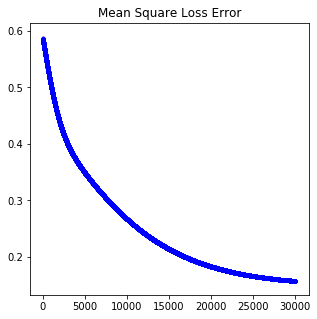

In [3]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_trues, y_preds):
  # y_trues and y_preds are numpy arrays of the same length.
  diff = np.square(y_trues - y_preds)
  return np.mean(np.apply_along_axis(np.sum, 1, diff))

class NeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 2 neurons (o1, o2)
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()
    self.w7 = np.random.normal()
    self.w8 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()
    self.b4 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    o2 = sigmoid(self.w7 * h1 + self.w6 * h2 + self.b4)
    return o1, o2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a (n x 2) numpy array with n elements.
    '''
    learn_rate = 0.0005
    epochs = 30000 # number of times to loop through the entire dataset
    y_pred = [0,0]
    
    loss = 100

    # plot loss during training
    fig1, ax1 = plt.subplots(figsize=(5,5))
    ax1.set_title('Mean Square Loss Error')
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred[0] = o1

        sum_o2 = self.w7 * h1 + self.w8 * h2 + self.b4
        o2 = sigmoid(sum_o2)
        y_pred[1] = o2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred1 = -2 * (y_true[0] - y_pred[0])
        d_L_d_ypred2 = -2 * (y_true[1] - y_pred[1])

        # - Neuron o1
        d_ypred1_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred1_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred1_d_b3 = deriv_sigmoid(sum_o1)

        # - Neuron o2
        d_ypred2_d_w7 = h1 * deriv_sigmoid(sum_o2)
        d_ypred2_d_w8 = h2 * deriv_sigmoid(sum_o2)
        d_ypred2_d_b4 = deriv_sigmoid(sum_o2)

        # - Neuron h1
        d_ypred1_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred2_d_h1 = self.w7 * deriv_sigmoid(sum_o2)
        
        # w2
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_ypred1_d_w2 = d_ypred1_d_h1 * d_h1_d_w2
        d_ypred2_d_w2 = d_ypred2_d_h1 * d_h1_d_w2
        d_L_d_w2 = d_L_d_ypred1 * d_ypred1_d_w2 + d_L_d_ypred2 * d_ypred2_d_w2

        # w1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_ypred1_d_w1 = d_ypred1_d_h1 * d_h1_d_w1
        d_ypred2_d_w1 = d_ypred2_d_h1 * d_h1_d_w1
        d_L_d_w1 = d_L_d_ypred1 * d_ypred1_d_w1 + d_L_d_ypred2 * d_ypred2_d_w1

        # Neuron h2
        d_ypred1_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
        d_ypred2_d_h2 = self.w8 * deriv_sigmoid(sum_o2)

        # w4
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_ypred1_d_w4 = d_ypred1_d_h2 * d_h2_d_w4
        d_ypred2_d_w4 = d_ypred2_d_h2 * d_h2_d_w4
        # w4 influences the loss function via y_pred1 as well as via y_pred2
        d_L_d_w4 = d_L_d_ypred1 * d_ypred1_d_w4 + d_L_d_ypred2 * d_ypred2_d_w4

        # w3
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_ypred1_d_w3 = d_ypred1_d_h2 * d_h2_d_w3
        d_ypred2_d_w3 = d_ypred2_d_h2 * d_h2_d_w3
        d_L_d_w3 = d_L_d_ypred1 * d_ypred1_d_w3 + d_L_d_ypred2 * d_ypred2_d_w3

        # b2
        d_h2_d_b2 = deriv_sigmoid(sum_h2)
        d_ypred1_d_b2 = d_ypred1_d_h2 * d_h2_d_b2
        d_ypred2_d_b2 = d_ypred2_d_h2 * d_h2_d_b2
        d_L_d_b2 = d_L_d_ypred1 * d_ypred1_d_b2 + d_L_d_ypred2 * d_ypred2_d_b2

        # b1
        d_h1_d_b1 = deriv_sigmoid(sum_h1)
        d_ypred1_d_b1 = d_ypred1_d_h1 * d_h1_d_b1
        d_ypred2_d_b1 = d_ypred2_d_h1 * d_h1_d_b1
        d_L_d_b1 = d_L_d_ypred1 * d_ypred1_d_b1 + d_L_d_ypred2 * d_ypred2_d_b1

        # --- Update weights and biases
        # Weights
        
        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred1 * d_ypred1_d_w5
        self.w6 -= learn_rate * d_L_d_ypred1 * d_ypred1_d_w6
        self.b3 -= learn_rate * d_L_d_ypred1 * d_ypred1_d_b3

        # Neuron o2
        self.w7 -= learn_rate * d_L_d_ypred2 * d_ypred2_d_w7
        self.w8 -= learn_rate * d_L_d_ypred2 * d_ypred2_d_w8
        self.b4 -= learn_rate * d_L_d_ypred2 * d_ypred2_d_b4

        # Neuron h1
        self.w1 -= learn_rate * d_L_d_w1
        self.w2 -= learn_rate * d_L_d_w2
        self.b1 -= learn_rate * d_L_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_w3
        self.w4 -= learn_rate * d_L_d_w4
        self.b2 -= learn_rate * d_L_d_b2

      # --- Calculate total loss
      # get predictions for all samples from data
      # apply feedforward along x axis
      y_preds = np.apply_along_axis(self.feedforward, 1, data)
      if loss < mse_loss(all_y_trues, y_preds):
        break
      loss = mse_loss(all_y_trues, y_preds)
      ax1.scatter(epoch, loss, marker='.', c='b')

      if epoch % 500 == 0:
        print("Epoch %d loss: %.5f" % (epoch, loss))

    #plt.show()
    print('loss: ', loss)

# Train our neural network!
best_network = NeuralNetwork()
best_network.train(data, all_y_trues)
best_loss = mse_loss(all_y_trues, np.apply_along_axis(best_network.feedforward, 1, data))

#for i in range(1,10):
#  network = NeuralNetwork()
#  network.train(data, all_y_trues)
#  if mse_loss(all_y_trues, np.apply_along_axis(best_network.feedforward, 1, data)) < best_loss:
#    best_loss = mse_loss(all_y_trues, np.apply_along_axis(best_network.feedforward, 1, data))
#    best_network = network

print('best_loss: ', best_loss)

# Make some predictions
y_preds = np.apply_along_axis(best_network.feedforward, 1, pred_data[:,1:3])
for i in range(len(y_preds)):
  print(pred_data[i,0], y_preds[i])